La precisión del modelo es: 0.8360655737704918
Matriz de Confusión: 
[[602   8]
 [112  10]]


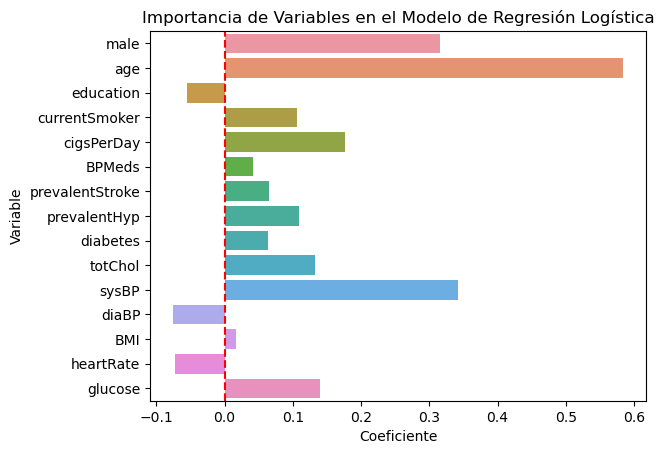

In [2]:
# Importar bibliotecas requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Cargar el conjunto de datos
dataset_path = 'C:/anaconda_data/framingham.csv'
data_frame = pd.read_csv(dataset_path)

# Remover registros con datos faltantes
data_frame.dropna(inplace=True)

# Descomponer en variables predictoras y objetivo
Feature_Matrix = data_frame.drop('TenYearCHD', axis=1)
Target_Vector = data_frame['TenYearCHD']

# Particionar el conjunto de datos
Train_Features, Test_Features, Train_Target, Test_Target = train_test_split(Feature_Matrix, Target_Vector, test_size=0.2, random_state=42)

# Escalar las características
scaler_object = StandardScaler()
Scaled_Train_Features = scaler_object.fit_transform(Train_Features)
Scaled_Test_Features = scaler_object.transform(Test_Features)

# Entrenar el modelo de regresión logística
logistic_regressor = LogisticRegression(random_state=42)
logistic_regressor.fit(Scaled_Train_Features, Train_Target)

# Realizar predicciones
Predicted_Values = logistic_regressor.predict(Scaled_Test_Features)

# Calcular la precisión
model_accuracy = accuracy_score(Test_Target, Predicted_Values)

# Generar matriz de confusión
confusion_mat = confusion_matrix(Test_Target, Predicted_Values)

# Coeficientes del modelo
model_coefficients = logistic_regressor.coef_[0]

# Gráfico de importancia de variables usando Seaborn (cambio de gráfico)
sns.barplot(x=model_coefficients, y=Feature_Matrix.columns)
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.title('Importancia de Variables en el Modelo de Regresión Logística')
plt.axvline(x=0, color='r', linestyle='--')

# Imprimir la precisión y la matriz de confusión
print(f"La precisión del modelo es: {model_accuracy}")
print(f"Matriz de Confusión: \n{confusion_mat}")
